In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from keras.metrics import Recall

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df= pd.read_csv("./dataset/myOwnDataset/myDataset.csv", encoding='utf-16')
df.head()

sentence  type
0                a     1
1              a'      1
2            a' --     1
3  a' or 1 = 1; --     1
4                @     1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18900 entries, 0 to 18899
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  18880 non-null  object
 1   type      18900 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 295.4+ KB


In [6]:
df.dropna(inplace=True)#to drop out nan values

C:\Users\feras\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of malicious and benign queries')

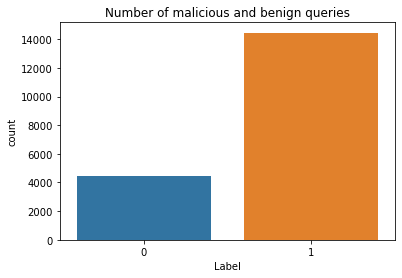

In [7]:
sns.countplot(df.type)
plt.xlabel('Label')
plt.title('Number of malicious and benign queries')

In [8]:
X=df['sentence']
y=df['type']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DataPreprocessing

In [10]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [11]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [18]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=[Recall()])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [19]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
95/95 [==============================] - 25s 229ms/step - loss: 0.3085 - recall: 0.9728 - val_loss: 0.0423 - val_recall: 0.9810
Epoch 2/10
95/95 [==============================] - 22s 236ms/step - loss: 0.0209 - recall: 0.9954 - val_loss: 0.0199 - val_recall: 0.9970
Epoch 3/10
95/95 [==============================] - 22s 229ms/step - loss: 0.0125 - recall: 0.9975 - val_loss: 0.0195 - val_recall: 0.9970
Epoch 4/10
95/95 [==============================] - 21s 219ms/step - loss: 0.0102 - recall: 0.9976 - val_loss: 0.0179 - val_recall: 0.9970
Epoch 5/10
95/95 [==============================] - 21s 217ms/step - loss: 0.0094 - recall: 0.9977 - val_loss: 0.0147 - val_recall: 0.9970
Epoch 6/10
95/95 [==============================] - 21s 217ms/step - loss: 0.0096 - recall: 0.9974 - val_loss: 0.0156 - val_recall: 0.9970


In [20]:
X_test_sequences = tok.texts_to_sequences(X_test)
X_test_sequences_matrix = sequence.pad_sequences(X_test_sequences,maxlen=max_len)

In [28]:
recall = model.evaluate(X_test_sequences_matrix,y_test)

118/118 [==============================] - 4s 31ms/step - loss: 0.0190 - recall: 0.9972- ETA: 0s - loss: 0.0151 - 


In [29]:
print('Test set\n Loss: {:0.3f}\n Recall: {:0.3f}'.format(recall[0],recall[1]))

Test set
 Loss: 0.019
 Recall: 0.997


In [23]:
y_pred=model.predict(X_test_sequences_matrix)

In [24]:
print(y_pred)

[[9.9999803e-01]
 [1.0000000e+00]
 [1.8402205e-09]
 ...
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]]


In [25]:
for i in range(len(y_pred)):
    if y_pred[i]>0.5:
        y_pred[i]=1
    elif y_pred[i]<=0.5:
        y_pred[i]=0

In [26]:
print(y_pred)

[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
confusion_matrix(y_test, y_pred)
# plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred, zero_division=1)
recall= recall_score(y_test, y_pred, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

 Accuracy : 0.9965572033898306 
 Precision : 0.9982788296041308 
 Recall : 0.9972489683631361


saving the model

In [30]:
from keras.models import load_model
from pathlib import Path


# Save neural network's trained weights
model.save_weights("lstm_weights.h5")
print('done')

# or you can save the full model via:
model.save('lstm_model.h5')

done


In [11]:
#loading the model and the weights:
loaded_model = tf.keras.models.load_model('lstm_model.h5')
loaded_model.load_weights('lstm_weights.h5')  # to load

# Predicting Data from user

In [14]:
def clean_data(input_val):

    txts = tok.texts_to_sequences(input_val)
    input_val = sequence.pad_sequences(txts, maxlen=max_len)

    return input_val


def predict_sqli_attack():
    
    repeat=True
    
    space=''
    for i in range(20):
        space+= "-"

    print(space) 
    input_val=input("Please enter some data: ")
    print(space)

    
    if input_val== '0':
        repeat=False
    
    sample_texts_list = []
    sample_texts_list.append(input_val)
    txts = tok.texts_to_sequences(sample_texts_list)
    txts = sequence.pad_sequences(txts, maxlen=max_len)

    result=loaded_model.predict(txts)
    print(result)


    print(space)
    
    
    if repeat == True:
            if result > 0.5:
                 print("ALERT! This can be SQL injection")
            elif result <= 0.5:
                 print("It seems to be a benign")
            
            print(space)
        
            predict_sqli_attack()
            
    elif repeat == False:
        print( " Closing ")
        

In [15]:
predict_sqli_attack()

--------------------
Please enter some data: hello
--------------------
[[0.04871616]]
--------------------
It seems to be a benign
--------------------
--------------------
Please enter some data: &(n&1: select * from users where id=1 or ($+)=1 or 1=1 -- 1
--------------------
[[1.]]
--------------------
ALERT! This can be SQL injection
--------------------
--------------------
Please enter some data: AND (SELECT * FROM (SELECT(SLEEP(5)))nQIP)--
--------------------
[[0.99993753]]
--------------------
ALERT! This can be SQL injection
--------------------
--------------------
Please enter some data: ORDER BY 1,SLEEP(5),BENCHMARK(1000000,MD5('A')),4,5,6,7,8
--------------------
[[1.]]
--------------------
ALERT! This can be SQL injection
--------------------
--------------------
Please enter some data: );waitfor delay '0:0:__TIME__'--
--------------------
[[1.]]
--------------------
ALERT! This can be SQL injection
--------------------
--------------------
Please enter some data: , ( se